<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.362787,32.232776,0.180942,87.776504,87.573380,0.203124
1,0.0,1.0,43.063711,57.205304,-0.076950,110.192065,110.249775,-0.057710
2,0.0,2.0,24.513644,85.602207,-0.147950,119.967901,120.106166,-0.138265
3,0.0,3.0,56.965095,40.491707,-0.015268,107.441534,107.430775,0.010759
4,0.0,4.0,72.416978,73.842628,-0.125201,156.134405,156.230289,-0.095884
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.363025,22.497070,0.156465,88.016560,87.830919,0.185641
119996,999.0,116.0,66.471798,40.974300,0.446509,117.892606,117.426942,0.465664
119997,999.0,117.0,36.404920,75.556423,-0.361180,121.600163,121.969425,-0.369262
119998,999.0,118.0,51.543579,78.403571,0.043951,139.991101,139.954537,0.036564


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    45.362787  32.232776  0.180942   87.776504   87.573380  0.203124
      1.0    43.063711  57.205304 -0.076950  110.192065  110.249775 -0.057710
      2.0    24.513644  85.602207 -0.147950  119.967901  120.106166 -0.138265
      3.0    56.965095  40.491707 -0.015268  107.441534  107.430775  0.010759
      4.0    72.416978  73.842628 -0.125201  156.134405  156.230289 -0.095884
...                ...        ...       ...         ...         ...       ...
999.0 115.0  55.363025  22.497070  0.156465   88.016560   87.830919  0.185641
      116.0  66.471798  40.974300  0.446509  117.892606  117.426942  0.465664
      117.0  36.404920  75.556423 -0.361180  121.600163  121.969425 -0.369262
      118.0  51.543579  78.403571  0.043951  139.991101  139.954537  0.036564
      119.0  79.559321  54.174676 -0.113524  143.620473  143.721142 -0.100669

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    45.362787  32.232776  0.180942   87.776504   87.573380  0.203124
      1.0    43.063711  57.205304 -0.076950  110.192065  110.249775 -0.057710
      2.0    24.513644  85.602207 -0.147950  119.967901  120.106166 -0.138265
      3.0    56.965095  40.491707 -0.015268  107.441534  107.430775  0.010759
      4.0    72.416978  73.842628 -0.125201  156.134405  156.230289 -0.095884
...                ...        ...       ...         ...         ...       ...
999.0 115.0  55.363025  22.497070  0.156465   88.016560   87.830919  0.185641
      116.0  66.471798  40.974300  0.446509  117.892606  117.426942  0.465664
      117.0  36.404920  75.556423 -0.361180  121.600163  121.969425 -0.369262
      118.0  51.543579  78.403571  0.043951  139.991101  139.954537  0.036564
      119.0  79.559321  54.174676 -0.113524  143.620473  143.721142 -0.100669

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,45.362787,32.232776,0.180942,87.776504,87.573380,0.203124
1,0.0,1.0,43.063711,57.205304,-0.076950,110.192065,110.249775,-0.057710
2,0.0,2.0,24.513644,85.602207,-0.147950,119.967901,120.106166,-0.138265
3,0.0,3.0,56.965095,40.491707,-0.015268,107.441534,107.430775,0.010759
4,0.0,4.0,72.416978,73.842628,-0.125201,156.134405,156.230289,-0.095884
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,55.363025,22.497070,0.156465,88.016560,87.830919,0.185641
119996,999.0,116.0,66.471798,40.974300,0.446509,117.892606,117.426942,0.465664
119997,999.0,117.0,36.404920,75.556423,-0.361180,121.600163,121.969425,-0.369262
119998,999.0,118.0,51.543579,78.403571,0.043951,139.991101,139.954537,0.036564


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    45.362787  32.232776  0.180942   87.776504   87.573380  0.203124
      1.0    43.063711  57.205304 -0.076950  110.192065  110.249775 -0.057710
      2.0    24.513644  85.602207 -0.147950  119.967901  120.106166 -0.138265
      3.0    56.965095  40.491707 -0.015268  107.441534  107.430775  0.010759
      4.0    72.416978  73.842628 -0.125201  156.134405  156.230289 -0.095884
...                ...        ...       ...         ...         ...       ...
999.0 115.0  55.363025  22.497070  0.156465   88.016560   87.830919  0.185641
      116.0  66.471798  40.974300  0.446509  117.892606  117.426942  0.465664
      117.0  36.404920  75.556423 -0.361180  121.600163  121.969425 -0.369262
      118.0  51.543579  78.403571  0.043951  139.991101  139.954537  0.036564
      119.0  79.559321  54.174676 -0.113524  143.620473  143.721142 -0.100669

[120000 rows x 6 columns]

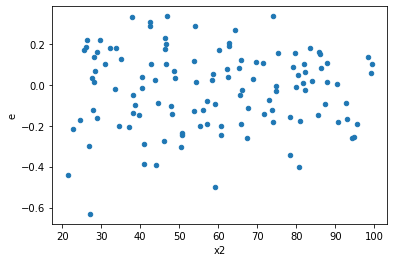

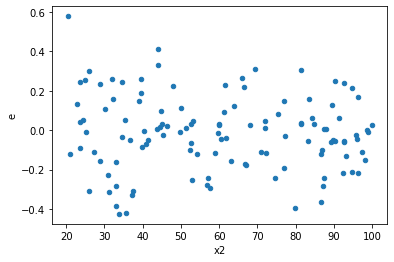

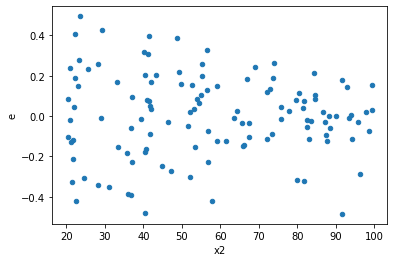

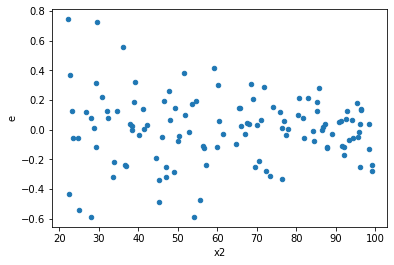

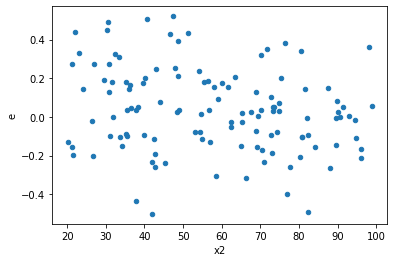

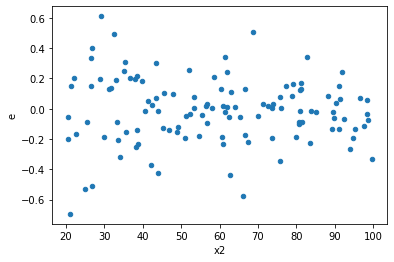

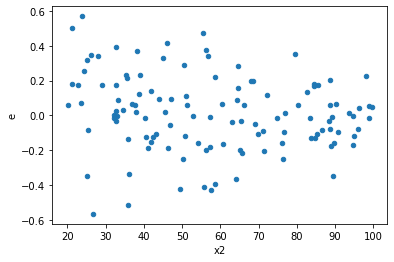

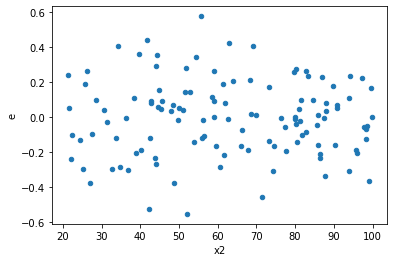

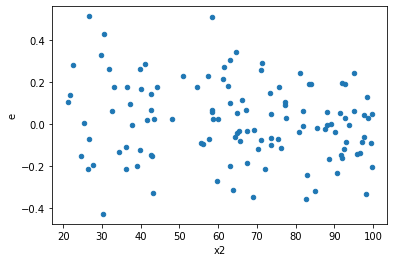

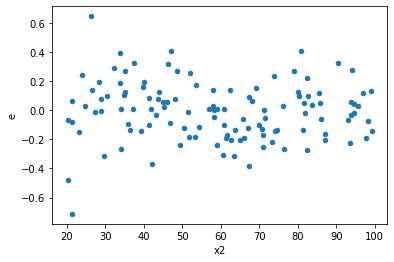

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
4.0,65.0,51.0,2.7364814203859074,2.564921346128514,0.04209971415978319,0.050292575414284585,1.1946061016805627,0.5119725524657885,0.7440137237671057,0.25598627623289427,Reject001=1 : Homoscedasticity
8.0,51.0,65.0,1.0741760307849555,2.63327121296559,0.0210622751134305,0.040511864814855233,1.9234325160353913,0.013020639834117942,0.993489680082941,0.006510319917058971,Reject001=1 : Homoscedasticity
9.0,61.0,55.0,1.9005816823915982,2.729657693244531,0.031157076760518,0.049630139877173296,1.5929010368541445,0.08124278014757613,0.9593786099262119,0.040621390073788066,Reject001=1 : Homoscedasticity
11.0,59.0,57.0,2.8227371334851994,3.161487760708506,0.04784300226246101,0.055464697556289584,1.1593063757164916,0.5765846756506967,0.7117076621746516,0.28829233782534835,Reject001=1 : Homoscedasticity
13.0,67.0,49.0,2.344492277352547,2.7468448989027143,0.03499242205003802,0.056058059161279886,1.6020056880063545,0.08496793373512834,0.9575160331324358,0.04248396686756417,Reject001=1 : Homoscedasticity
18.0,63.0,53.0,1.9162804124783663,3.196623781254583,0.030417149404418514,0.06031365625008647,1.982883256026782,0.011418784056746345,0.9942906079716268,0.0057093920283731725,Reject001=1 : Homoscedasticity
21.0,51.0,65.0,2.0681418149159385,3.2212465438337516,0.04055180029246938,0.04955763913590387,1.2220823435330173,0.442532077324838,0.778733961337581,0.221266038662419,Reject001=1 : Homoscedasticity
22.0,65.0,51.0,1.7829244713967478,2.6781844328916224,0.027429607252257657,0.05251342025277691,1.9144794808702437,0.017192385916064534,0.9914038070419677,0.008596192958032267,Reject001=1 : Homoscedasticity
23.0,66.0,50.0,2.1156610246472742,3.1610860223299264,0.03205547007041325,0.06322172044659853,1.97225997022428,0.013248208773099623,0.9933758956134502,0.006624104386549812,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,60.0,56.0,2.4691782285694117,1.727533405403157,0.04115297047615686,0.03084881081077066,0.7496132224196014,0.2735135579594214,Reject001=1 : Homoscedasticity
1.0,57.0,59.0,2.7846021159743226,1.3435259484282809,0.048852668701303906,0.022771626244547132,0.46612860361381536,0.004341971552041292,Reject001=0 : Heteroscedasticity
2.0,57.0,59.0,2.8256083415690476,2.050055005659603,0.04957207616787803,0.03474669501117971,0.7009328173689657,0.18001386247375406,Reject001=1 : Homoscedasticity
3.0,64.0,52.0,4.2805667162148175,1.923119204354035,0.06688385494085652,0.03698306162219298,0.5529445283154812,0.02444259165756784,Reject001=1 : Homoscedasticity
4.0,65.0,51.0,2.7364814203859074,2.564921346128514,0.04209971415978319,0.050292575414284585,1.1946061016805627,0.5119725524657885,Reject001=1 : Homoscedasticity
5.0,58.0,58.0,4.116978499423344,1.4636100475271463,0.07098238792109214,0.02523465599184735,0.35550587590684546,0.00012348312244052974,Reject001=0 : Heteroscedasticity
6.0,56.0,60.0,3.1903935803948285,2.116805820226451,0.05697131393562194,0.035280097003774186,0.6192607220476078,0.07194484476394924,Reject001=1 : Homoscedasticity
7.0,51.0,65.0,3.134401300798043,2.0637568986947445,0.061458849035255746,0.0317501061337653,0.5166075615173319,0.01543483915880029,Reject001=1 : Homoscedasticity
8.0,51.0,65.0,1.0741760307849555,2.63327121296559,0.0210622751134305,0.040511864814855233,1.9234325160353913,0.013020639834117942,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      843
Reject001=0 : Heteroscedasticity    157
Name: Result_test, dtype: int64